# ML4 - Disease Prediction

In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
  
%matplotlib inline


In [2]:
Data_path = 'D:\Desktop\Training.csv'
data = pd.read_csv(Data_path)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## Getting preparing and processing the Data

In [4]:
data = data.dropna(axis=1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
disease_counts = data["prognosis"].value_counts()
disease_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [7]:
temp_df = pd.DataFrame({ 
    "Disease": disease_counts.index, 
    "Counts": disease_counts.values 
}) 
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


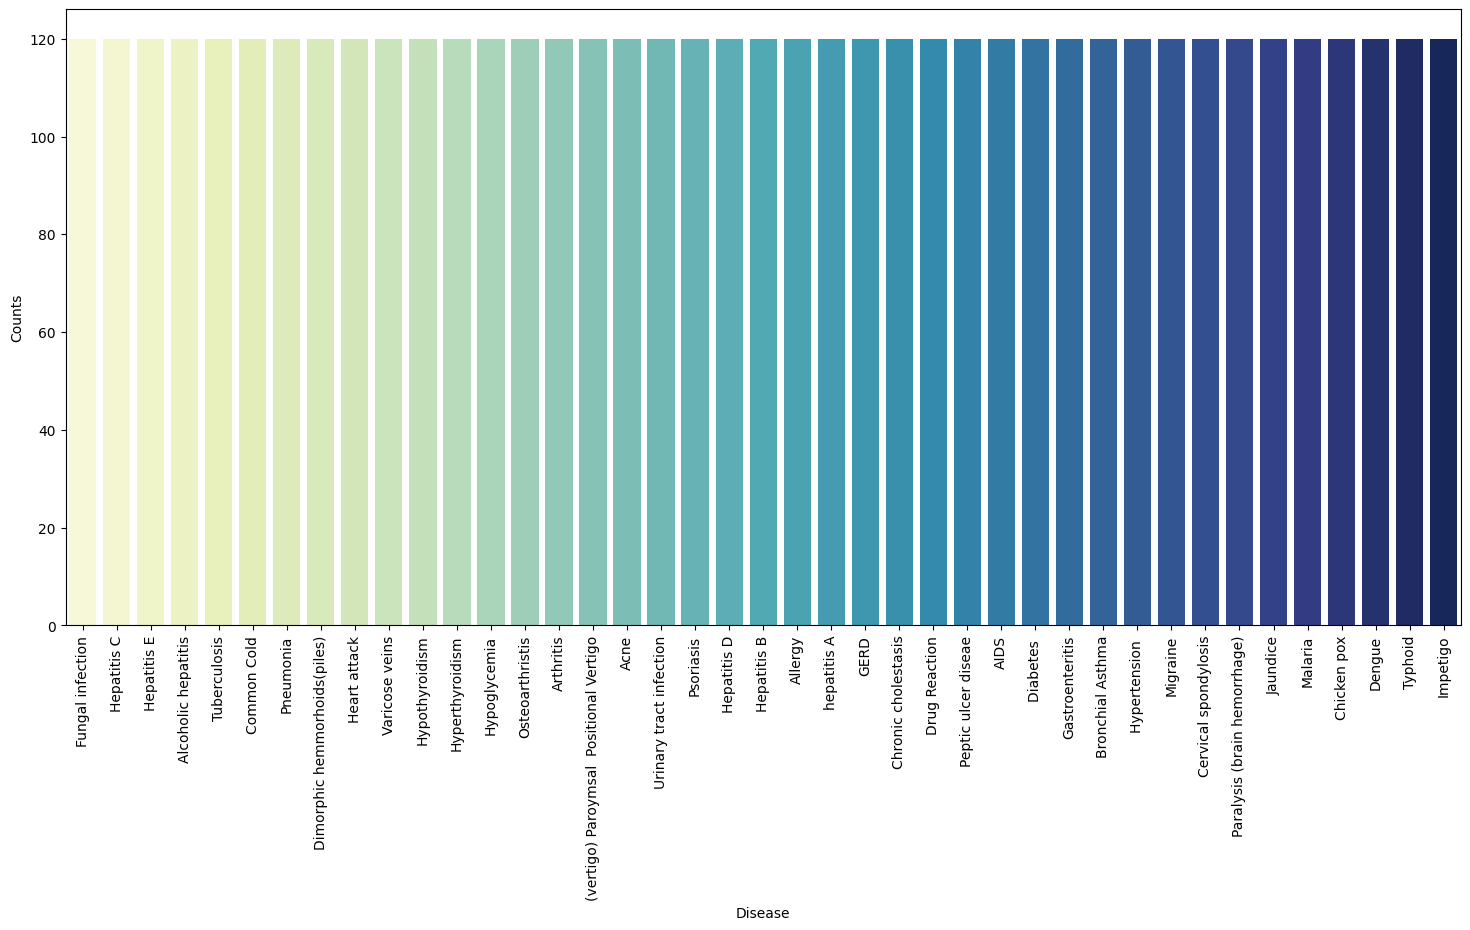

In [16]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (18,8)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df, palette = 'YlGnBu') 
plt.xticks(rotation=90) 
plt.show()

In [17]:
# Encoding the target value into numerical (from 0 to n-1 classes) 

encoder = LabelEncoder() 
data["prognosis"] = encoder.fit_transform(data["prognosis"]) 


In [18]:
data["prognosis"]

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [19]:
encoder.inverse_transform([0, 0, 1, 2])

array(['(vertigo) Paroymsal  Positional Vertigo',
       '(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne'],
      dtype=object)

The label encoder transforms the categorical values(here the diseases) into numerical values.

## Splitting the Data

In [23]:
X = data.iloc[:,:-1]   # splitting the target variable column
y = data.iloc[:, -1]   # isolating the target variable column
X_train, X_test, y_train, y_test =train_test_split( 
  X, y, test_size = 0.2, random_state = 24) 
  
print(f"\nTrain: {X_train.shape}, {y_train.shape}\n") 
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)

Test: (984, 132), (984,)


In [24]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y): 
    return accuracy_score(y, estimator.predict(X)) 
  
# Initializing Models 
models = { 
    "SVC":SVC(), 
    "Gaussian NB":GaussianNB(), 
    "Random Forest":RandomForestClassifier(random_state=18) 
} 
  
# Producing cross validation score for the models 
# cv -> we split the training data into 10 subsets and train with nine and test one
#       now we test the 2nd one and train with the other nine and so forth(10-fold)
# n_jobs=-1 uses all available cpu cores

for model_name in models: 
    model = models[model_name] 
    scores = cross_val_score(model, X, y, cv = 10,  
                             n_jobs = -1,  
                             scoring = cv_scoring) 
    print("=="*30) 
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.00%
Accuracy on test data by SVM Classifier: 100.00%


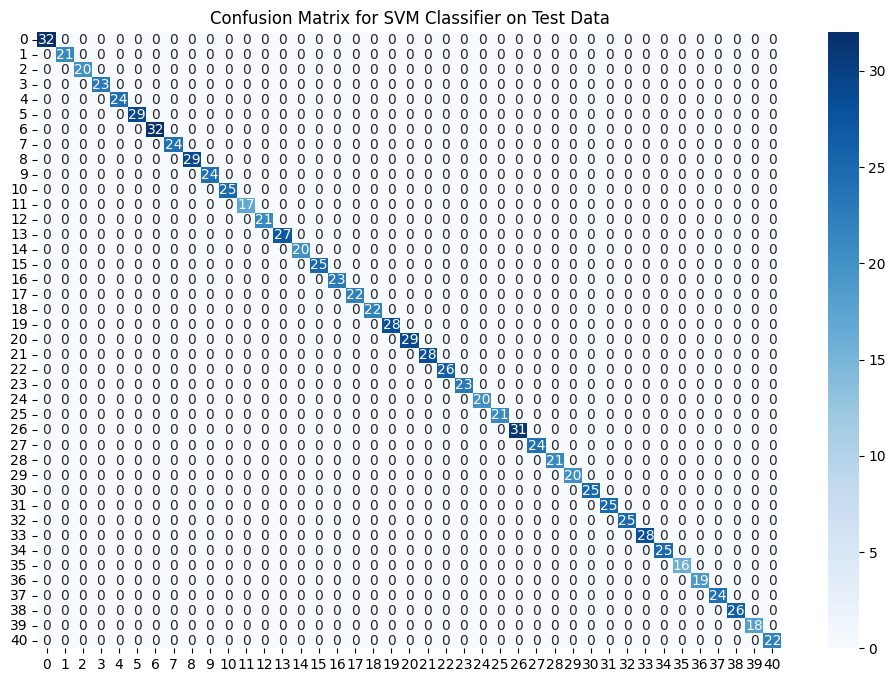

In [27]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: "
      f"{accuracy_score(y_train, svm_model.predict(X_train)) * 100:.2f}%")

print(f"Accuracy on test data by SVM Classifier: "
      f"{accuracy_score(y_test, preds) * 100:.2f}%")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


Accuracy on train data by Naive Bayes Classifier: 100.00%
Accuracy on test data by Naive Bayes Classifier: 100.00%


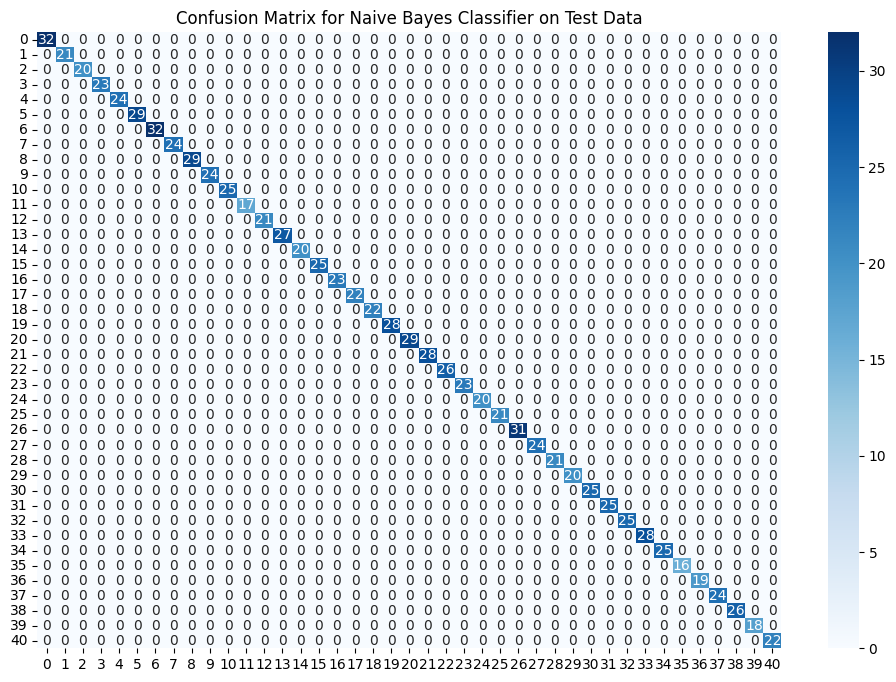

In [28]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier: "
      f"{accuracy_score(y_train, nb_model.predict(X_train)) * 100:.2f}%")

print(f"Accuracy on test data by Naive Bayes Classifier: "
      f"{accuracy_score(y_test, preds) * 100:.2f}%")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 100.00%


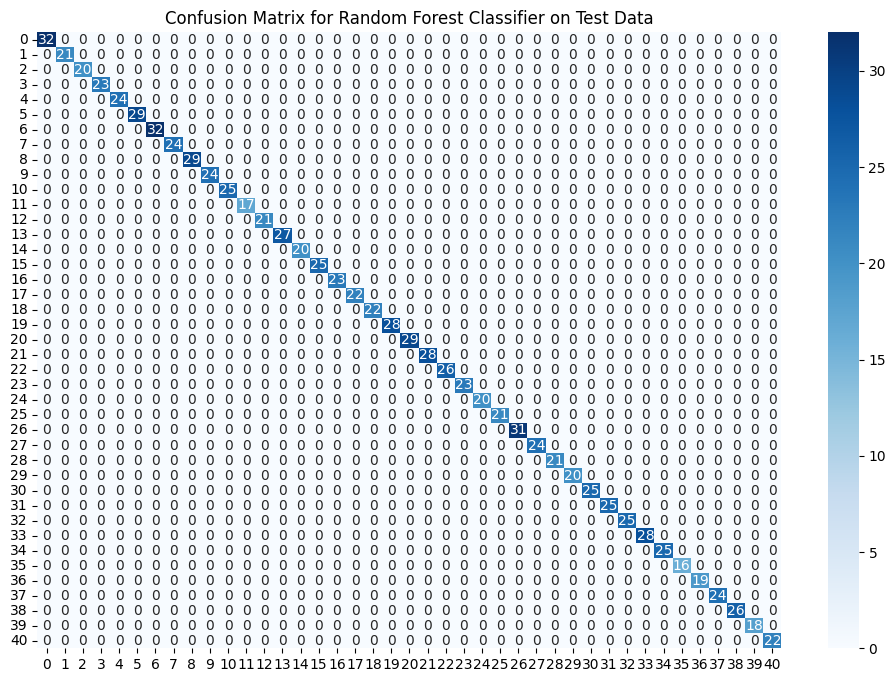

In [29]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier: "
      f"{accuracy_score(y_train, rf_model.predict(X_train)) * 100:.2f}%")

print(f"Accuracy on test data by Random Forest Classifier: "
      f"{accuracy_score(y_test, preds) * 100:.2f}%")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


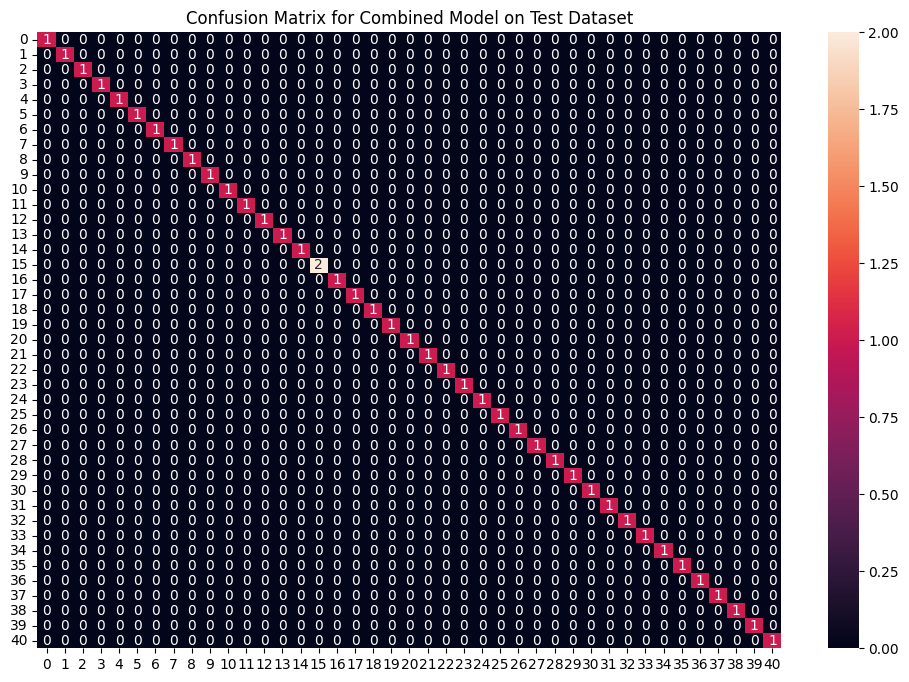

In [39]:
# Training the models on whole data 
final_svm_model = SVC() 
final_nb_model = GaussianNB() 
final_rf_model = RandomForestClassifier(random_state=18) 
final_svm_model.fit(X, y) 
final_nb_model.fit(X, y) 
final_rf_model.fit(X, y) 
  
# Reading the test data 
test_data = pd.read_csv('D:\Desktop\Testing.csv').dropna(axis=1) 
  
test_X = test_data.iloc[:, :-1] 
test_Y = encoder.transform(test_data.iloc[:, -1]) 
  
# Making prediction by take mode of predictions  
# made by all the classifiers 
svm_preds = final_svm_model.predict(test_X) 
nb_preds = final_nb_model.predict(test_X) 
rf_preds = final_rf_model.predict(test_X) 
  
final_preds = [mode([i,j,k])[0] for i,j, 
               k in zip(svm_preds, nb_preds, rf_preds)] 
  
print(f"Accuracy on Test dataset by the combined model: " 
      f"{accuracy_score(test_Y, final_preds)*100}") 
  
cf_matrix = confusion_matrix(test_Y, final_preds) 
plt.figure(figsize=(12,8)) 
  
sns.heatmap(cf_matrix, annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()

## Creating a symptom function

In [40]:
symptoms = X.columns.values 
print(symptoms)

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_

In [41]:
# Creating a symptom index dictionary to encode the 
# input symptoms into numerical form 
symptom_index = {} 
for index, value in enumerate(symptoms): # [(0, itching),(1,sore_throat),...]
    symptom = " ".join([i.capitalize() for i in value.split("_")]) # [(sore, throat),...] ->[(Sore Throat),...]
    symptom_index[symptom] = index 

# end result will look like this {'Dry Cough': 0, 'Runny Nose': 1, 'Fever': 2}

data_dict = { 
    "symptom_index":symptom_index, 
    "predictions_classes":encoder.classes_ 
} 

In [47]:
# Defining the Function 
# Input: string containing symptoms separated by commas 
# Output: Generated predictions by models 

def predictDisease(symptoms): 
    symptoms = symptoms.split(",")  # Split the input string into a list of symptoms

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])  # Initialize a list with zeros, one for each symptom index
    
    for symptom in symptoms:
        symptom = symptom.strip()  # Remove any leading or trailing whitespace from the symptom
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]  # Get the index for the symptom from the symptom_index dictionary
            input_data[index] = 1  # Set the corresponding index to 1 in the input_data list

    # reshaping the input data and converting it into a suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)  # Convert the list to a numpy array and reshape it to be 2D

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]  # Predict with the Random Forest model
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]  # Predict with the Naive Bayes model
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]  # Predict with the SVM model

    # making final prediction by taking mode of all predictions
    # Compute the mode of the predictions from the three models
    predictions_list = [rf_prediction, nb_prediction, svm_prediction]
    # Convert classes to indices for bincount
    class_indices = [list(data_dict["predictions_classes"]).index(pred) for pred in predictions_list]
    bincount = np.bincount(class_indices)
    final_prediction = list(data_dict["predictions_classes"])[np.argmax(bincount)]  # Get the most common (mode) prediction

    # Format the output nicely
    output = f"""
    ============================================================
    RF Model Prediction      : {rf_prediction}
    Naive Bayes Prediction   : {nb_prediction}
    SVM Model Prediction     : {svm_prediction}
    ------------------------------------------------------------
    Final Combined Prediction: {final_prediction}
    ============================================================
    """

    

    predictions = {
        "rf_model_prediction": rf_prediction, 
        "naive_bayes_prediction": nb_prediction, 
        "svm_model_prediction": svm_prediction, 
        "final_prediction": final_prediction 
    }

    return output

# Testing the function 
print(predictDisease("Itching, Skin Rash, Nodal Skin Eruptions"))


    RF Model Prediction      : Fungal infection
    Naive Bayes Prediction   : Fungal infection
    SVM Model Prediction     : Fungal infection
    ------------------------------------------------------------
    Final Combined Prediction: Fungal infection
    
